In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [2]:
import gensim
import spacy

In [3]:
import Distill

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import umap

In [4]:
Dataset = pd.read_json('../Dataset/Resume_1.json')

In [5]:
Data = []
Data_label = []
def read_dataset_return_list(Dataset):
    # must be a pandas DataFrame Object
    for i in Dataset.columns:
        Data.append(Dataset[i][0])
        Data_label.append(i)


In [6]:
read_dataset_return_list(Dataset)

In [7]:
def clean_text(text):
    text = Distill.tokenize(text)
    text = Distill.remove_stopwords(text)
    text = Distill.remove_tags(text)
    text = Distill.lemmatize(text)
    return text

In [12]:
# Preprocessing Pipeline
cleaned = []
for i in Data:
    cleaned.append(clean_text(i))


In [18]:
# vectorizer = TfidfVectorizer(stop_words='english', 
# max_features= 1000, # keep top 1000 terms 
# max_df = 0.5, 
# smooth_idf=True)

In [22]:
doc = []
for i in range(len(cleaned)):
    t = ' '.join(cleaned[i])
    doc.append(t)

In [24]:
# X = vectorizer.fit_transform(doc)

In [25]:
# X.shape

(21, 1000)

In [40]:
svd_model = TruncatedSVD(n_components=21
#                          , algorithm='randomized', n_iter=100, random_state=122)

In [41]:
svd_model.fit(X)

TruncatedSVD(n_components=21, n_iter=100, random_state=122)

In [42]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
test
 
testing
 
datum
 
client
 
develop
 
automation
 
report
 
Topic 1: 
expense
 
email
 
payment
 
employee
 
query
 
hold
 
matter
 
Topic 2: 
css
 
lecturer
 
store
 
user
 
website
 
science
 
language
 
Topic 3: 
test
 
testing
 
expense
 
form
 
payment
 
deploy
 
utilise
 
Topic 4: 
member
 
consultant
 
version
 
sale
 
html
 
client
 
net
 
Topic 5: 
consultant
 
httpswwwindeedcomrgovardhanakb2de315d95905b68isidrexdownloadikwdownloadtopcoin
 
developer
 
version
 
senior
 
datum
 
data
 
Topic 6: 
matter
 
lecturer
 
subject
 
science
 
bsc
 
main
 
12th
 
Topic 7: 
form
 
teaching
 
trial
 
guideline
 
clinical
 
accuracy
 
consistency
 
Topic 8: 
protocol
 
network
 
router
 
switch
 
matter
 
test
 
route
 
Topic 9: 
learning
 
different
 
engineering
 
input
 
possible
 
member
 
believe
 
Topic 10: 
server
 
deploy
 
httpswwwindeedcomrgovardhanakb2de315d95905b68isidrexdownloadikwdownloadtopcoin
 
matter
 
build
 
chef
 
database
 
Topic 11: 
requirement
 
ma

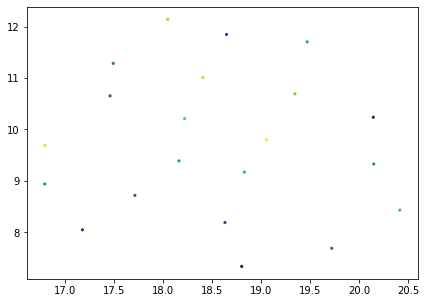

In [45]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=10, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = [a for a in range(21)],
s = 10, # size
edgecolor='none'
)
plt.show()

In [49]:
embedding.shape

(21, 2)

In [57]:
# embedding

 sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity as cos

In [66]:
similar = cos(embedding[1].reshape(1,-1),embedding[2].reshape(1,-1))

In [67]:
similar

array([[0.99949014]], dtype=float32)

In [68]:
import scipy

In [72]:
1-scipy.spatial.distance.cosine(embedding[1], embedding[6])

0.9999192357063293